In [68]:
import requests
import urllib.request
import time 
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Extraction of Table from Wikipedia (Medals In the oplympics)

In [69]:
page = requests.get('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table').text
soup = BeautifulSoup(page, 'html.parser')
tables = soup.find_all('table', class_="wikitable sortable")

In [70]:
df=pd.read_html(str(tables[0]))
Total_medals=pd.concat(df)
Total_medals.head()
Total_medals.columns=['Team','Appearances_Summer','Gold_Summer','Silver_Summer','Bronze_Summer','Total_Summer','Appearances_Winter','Gold_Winter','Silver_Winter','Bronze_Winter','Total_Winter','Appearances_Combined','Gold_Combined','Silver_Combined','Bronze_Combined','Total_Combined']
Total_medals.head()
Total_medals.head(20)
for i in range(Total_medals.shape[0]):
    Total_medals.iloc[i,0]=re.split(r'\xa0',Total_medals.iloc[i,0])[0]    

In [71]:
df=pd.read_html(str(tables[0]))
Total_medals=pd.concat(df)
Total_medals.head()
Total_medals.columns=['Team','Appearances_Summer','Gold_Summer','Silver_Summer','Bronze_Summer','Total_Summer','Appearances_Winter','Gold_Winter','Silver_Winter','Bronze_Winter','Total_Winter','Appearances_Combined','Gold_Combined','Silver_Combined','Bronze_Combined','Total_Combined']
Total_medals.head()
Total_medals.head(20)
for i in range(Total_medals.shape[0]):
    Total_medals.iloc[i,0]=re.split(r'\xa0',Total_medals.iloc[i,0])[0]


# Adding to the above table the average temperature and average GDP of the countries

In [72]:
url2='https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature'
html=urllib.request.urlopen(url2)
soup=BeautifulSoup(html,'html.parser')
tables=soup.find_all('table')
df=pd.read_html(str(tables[0]))
Temp=pd.concat(df)
Temp.head()
Temp.columns=['Country','Average_Temp_Celsius']
Temp.head()
print(Temp.shape)


(192, 2)


In [73]:
Total_medals['Temperature']=np.zeros((157,1))
for i in range(Total_medals.shape[0]):
    t1=Temp[Temp.Country==Total_medals.loc[i,'Team']]
    if len(t1)>0:
        text=t1.Average_Temp_Celsius.values
        if len(re.findall(r"^−",text[0]))==0:
            Total_medals.loc[i,'Temperature']=t1.Average_Temp_Celsius.values
        else:
            Total_medals.loc[i,'Temperature']=re.sub(r"^−","-",text[0])
        
    else:
        Total_medals.loc[i,'Temperature']=np.nan
        
        

In [74]:
url3='https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#:~:text=GDP%20%28US%24%20million%29%20by%20country%20%20%20,%20%20927%20%2028%20more%20rows%20'
html=urllib.request.urlopen(url3)
soup=BeautifulSoup(html,'html.parser')
tables=soup.find_all('table')
df=pd.read_html(str(tables[2]))
GDP=pd.concat(df)
GDP=GDP.iloc[1:,:]
GDP.head()
GDP.columns
GDP_Count=pd.concat([GDP[('Country/Territory', 'Country/Territory')],GDP[(('World Bank[14][15]', 'Estimate'))]],axis=1)
GDP_Count.columns=['Country','GDP (M USD)']
Total_medals['GDP(M USD)']=np.zeros((157,1))
for i in range(Total_medals.shape[0]):
    gdp1=GDP_Count[GDP_Count.Country==Total_medals.loc[i,'Team']]
    if len(gdp1)>0:
        Total_medals.loc[i,'GDP(M USD)']=gdp1['GDP (M USD)'].values
    else:
        Total_medals.loc[i,'GDP(M USD)']=np.nan
filter11=Total_medals.Team=='Soviet Union'
Total_medals[Total_medals.Team=='Russia']

,Team,Appearances_Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,Appearances_Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,Appearances_Combined,Gold_Combined,Silver_Combined,Bronze_Combined,Total_Combined,Temperature,GDP(M USD)
108,Russia,6,148,126,151,425,6,47,39,35,121,12,195,165,186,546,-5.35,1483498


In [75]:
Total_medals[Total_medals.Team=='Soviet Union']

,Team,Appearances_Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,Appearances_Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,Appearances_Combined,Gold_Combined,Silver_Combined,Bronze_Combined,Total_Combined,Temperature,GDP(M USD)
110,Soviet Union,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,NaN,NaN


In [76]:
columns=Total_medals.columns
Total_medals['Temperature'] = pd.to_numeric(Total_medals['Temperature'],downcast='float')

filter1=Total_medals.Team=='East Germany'
filter2=Total_medals.Team=='West Germany'
for i in columns[1:-2]:
    a1=Total_medals[filter1][i].values
    a2=Total_medals[filter2][i].values
    Total_medals.loc[46,i]=Total_medals.loc[46,i]+a1[0]+a2[0]
    print(i)
filter11=Total_medals.Team=='Soviet Union'
for i in columns[1:-2]:
    a11=Total_medals[filter11][i].values    
    Total_medals.loc[108,i]=Total_medals.loc[108,i]+a11[0]
    print(i)
filter_puerto=Total_medals.Team=='Puerto Rico'
Total_medals[filter_puerto]['Temperature']=26
    #Total_medals.iloc[]+Total_medals[Total_medals.Team=='West Germany']
#Total_medals[Total_medals['Temperature'].isnull()]

Appearances_Summer
Gold_Summer
Silver_Summer
Bronze_Summer
Total_Summer
Appearances_Winter
Gold_Winter
Silver_Winter
Bronze_Winter
Total_Winter
Appearances_Combined
Gold_Combined
Silver_Combined
Bronze_Combined
Total_Combined
Appearances_Summer
Gold_Summer
Silver_Summer
Bronze_Summer
Total_Summer
Appearances_Winter
Gold_Winter
Silver_Winter
Bronze_Winter
Total_Winter
Appearances_Combined
Gold_Combined
Silver_Combined
Bronze_Combined
Total_Combined


<ipython-input-76-b9bd3f901f1c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_medals[filter_puerto]['Temperature']=26


In [77]:
Total_medals[Total_medals.Team=='Russia']

,Team,Appearances_Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,Appearances_Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,Appearances_Combined,Gold_Combined,Silver_Combined,Bronze_Combined,Total_Combined,Temperature,GDP(M USD)
108,Russia,15,543,445,447,1435,15,125,96,94,315,30,668,541,541,1750,-5.35,1483498


In [78]:
Total_medals.dropna(axis=0,how='any',inplace=True)

<AxesSubplot:xlabel='Team', ylabel='Total_Winter'>

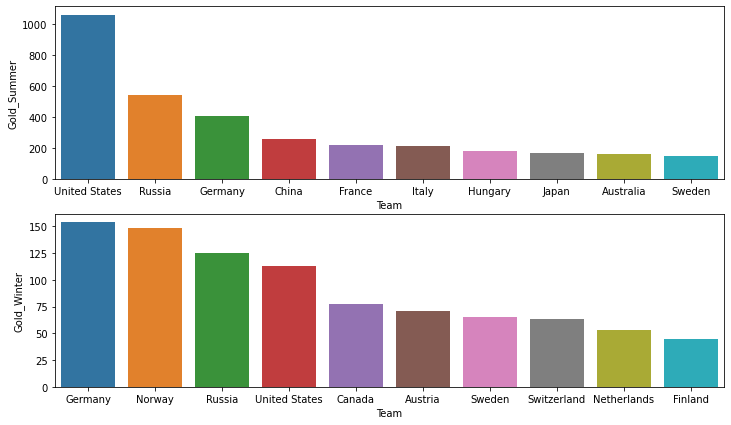

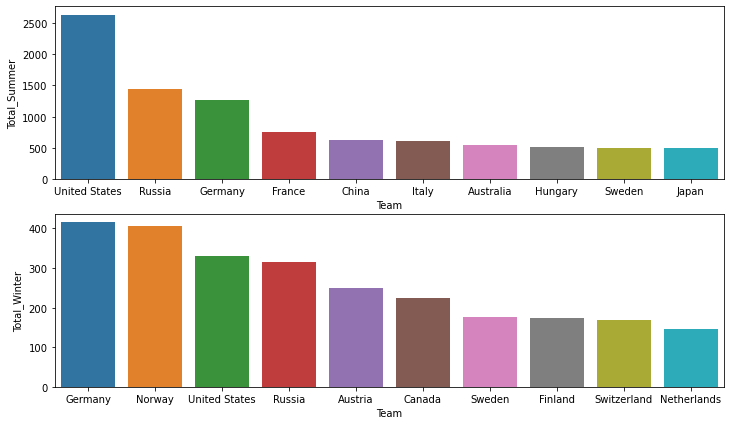

In [79]:
first_ten_summer=Total_medals.sort_values(['Gold_Summer'],ascending=False).iloc[0:10,:]
first_ten_winter=Total_medals.sort_values(['Gold_Winter'],ascending=False).iloc[0:10,:]

fix,axes=plt.subplots(2,1,figsize=(12,7))
sns.barplot(x='Team',y='Gold_Summer',data=first_ten_summer,ax=axes[0])
sns.barplot(x='Team',y='Gold_Winter',data=first_ten_winter,ax=axes[1])

first_ten_total_summer=Total_medals.sort_values(['Total_Summer'],ascending=False).iloc[0:10,:]
first_ten_total_winter=Total_medals.sort_values(['Total_Winter'],ascending=False).iloc[0:10,:]

fix,axes=plt.subplots(2,1,figsize=(12,7))
sns.barplot(x='Team',y='Total_Summer',data=first_ten_total_summer,ax=axes[0])
sns.barplot(x='Team',y='Total_Winter',data=first_ten_total_winter,ax=axes[1])

In [80]:
Total_medals[Total_medals.Team=='Russia']

,Team,Appearances_Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,Appearances_Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,Appearances_Combined,Gold_Combined,Silver_Combined,Bronze_Combined,Total_Combined,Temperature,GDP(M USD)
108,Russia,15,543,445,447,1435,15,125,96,94,315,30,668,541,541,1750,-5.35,1483498


([<matplotlib.axis.XTick at 0x14e876cef70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

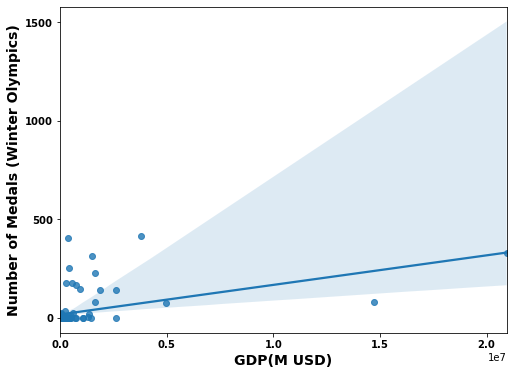

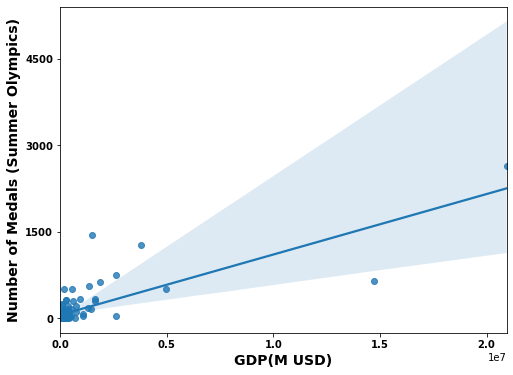

In [81]:
Total_medals['GDP(M USD)']=pd.to_numeric(Total_medals['GDP(M USD)'],errors = 'coerce')

plt.figure(figsize=(8,6))
sns.regplot(x='GDP(M USD)',y='Total_Winter',data=Total_medals)
plt.ylabel('Number of Medals (Winter Olympics)',fontsize=14,fontweight='bold')
plt.xlabel('GDP(M USD)',fontsize=14,fontweight='bold')
plt.yticks([0,500,1000,1500],fontweight='bold')
plt.xticks([0,0.5e7,1e7,1.5e7,2e7],fontweight='bold')
plt.figure(figsize=(8,6))
sns.regplot(x='GDP(M USD)',y='Total_Summer',data=Total_medals)
plt.ylabel('Number of Medals (Summer Olympics)',fontsize=14,fontweight='bold')
plt.xlabel('GDP(M USD)',fontsize=14,fontweight='bold')
plt.yticks([0,1500,3000,4500],fontweight='bold')
plt.xticks([0,0.5e7,1e7,1.5e7,2e7],fontweight='bold')

              Total_Summer  Total_Winter  Temperature
Total_Summer      1.000000      0.721873    -0.355092
Total_Winter      0.721873      1.000000    -0.472946
Temperature      -0.355092     -0.472946     1.000000


[Text(0.5, 0, 'Total_Summer'),
 Text(1.5, 0, 'Total_Winter'),
 Text(2.5, 0, 'Temperature')]

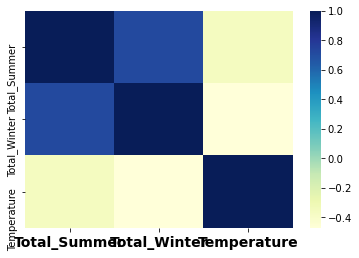

In [82]:

print(Total_medals.loc[:,['Total_Summer','Total_Winter','Temperature']].corr())
res =sns.heatmap(Total_medals.loc[:,['Total_Summer','Total_Winter','Temperature']].corr(), cmap="YlGnBu")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14,fontweight='bold')

              Total_Summer  Total_Winter  GDP(M USD)
Total_Summer      1.000000      0.721873    0.784449
Total_Winter      0.721873      1.000000    0.454604
GDP(M USD)        0.784449      0.454604    1.000000


[Text(0, 0.5, 'Total_Summer'),
 Text(0, 1.5, 'Total_Winter'),
 Text(0, 2.5, 'Temperature'),
 Text(0, 3.5, 'GDP(M USD)')]

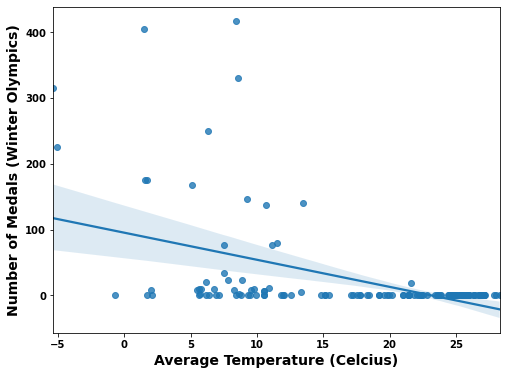

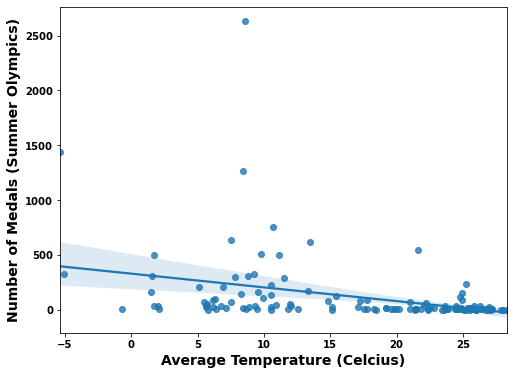

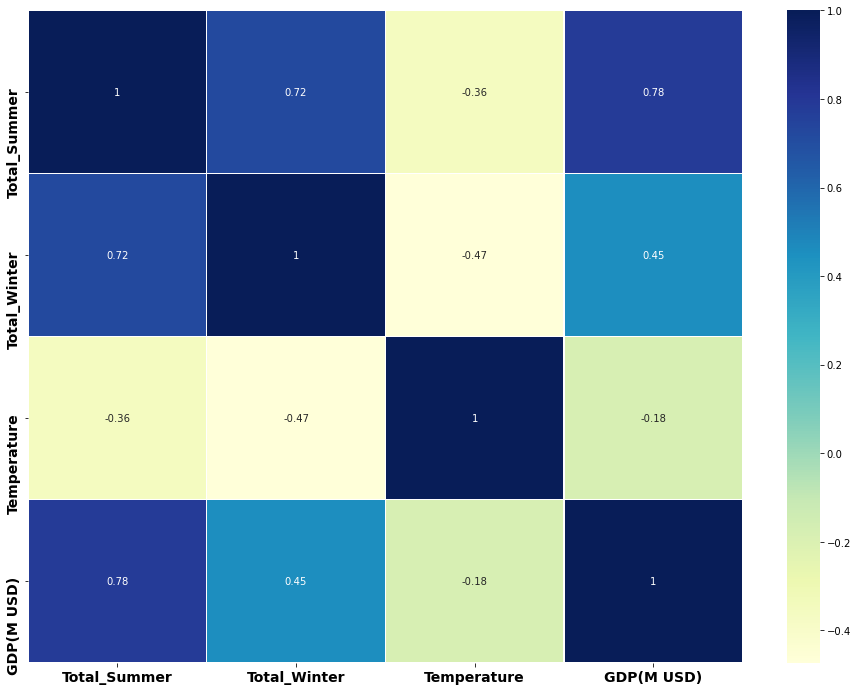

In [83]:

plt.figure(figsize=(8,6))
sns.regplot(x='Temperature',y='Total_Winter',data=Total_medals)
plt.ylabel('Number of Medals (Winter Olympics)',fontsize=14,fontweight='bold')
plt.xlabel('Average Temperature (Celcius)',fontsize=14,fontweight='bold')
plt.yticks([0,100,200,300 ,400],fontweight='bold')
plt.xticks(range(-5,30,5),fontweight='bold')
plt.figure(figsize=(8,6))
sns.regplot(x='Temperature',y='Total_Summer',data=Total_medals)
plt.ylabel('Number of Medals (Summer Olympics)',fontsize=14,fontweight='bold')
plt.xlabel('Average Temperature (Celcius)',fontsize=14,fontweight='bold')
plt.yticks([0,500,1000,1500 ,2000,2500],fontweight='bold')
plt.xticks(range(-5,30,5),fontweight='bold')
print(Total_medals.loc[:,['Total_Summer','Total_Winter','GDP(M USD)']].corr())
plt.figure(figsize=(16,12))

res=sns.heatmap(Total_medals.loc[:,['Total_Summer','Total_Winter','Temperature','GDP(M USD)']].corr(),annot=True, cmap="YlGnBu",linewidths=0.25)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14,fontweight='bold')
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 14,fontweight='bold')

In [84]:
Total_medals.dropna(axis=0,how='any',inplace=True)

In [85]:
Total_medals.isna().sum()

Team                    0
Appearances_Summer      0
Gold_Summer             0
Silver_Summer           0
Bronze_Summer           0
Total_Summer            0
Appearances_Winter      0
Gold_Winter             0
Silver_Winter           0
Bronze_Winter           0
Total_Winter            0
Appearances_Combined    0
Gold_Combined           0
Silver_Combined         0
Bronze_Combined         0
Total_Combined          0
Temperature             0
GDP(M USD)              0
dtype: int64

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

X=Total_medals.iloc[:,1:].values
X_f=StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_f)
PCA_VARS=pca.explained_variance_ratio_
print('Explained variance with principal components:',100*np.sum(PCA_VARS),'%')


Explained variance with principal components: 85.11103232813083 %


Text(0.5, 0, 'Number of clusters')

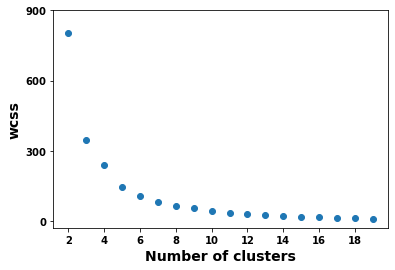

In [87]:
wcss=[]

for i in range(2,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
plt.scatter(range(2,20),wcss)
plt.yticks([0,300 ,600,900],fontweight='bold')
plt.xticks(range(2,20,2),fontweight='bold')
plt.ylabel('wcss',fontsize=14,fontweight='bold')
plt.xlabel('Number of clusters',fontsize=14,fontweight='bold')

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


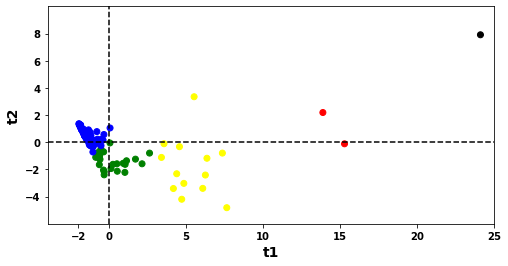

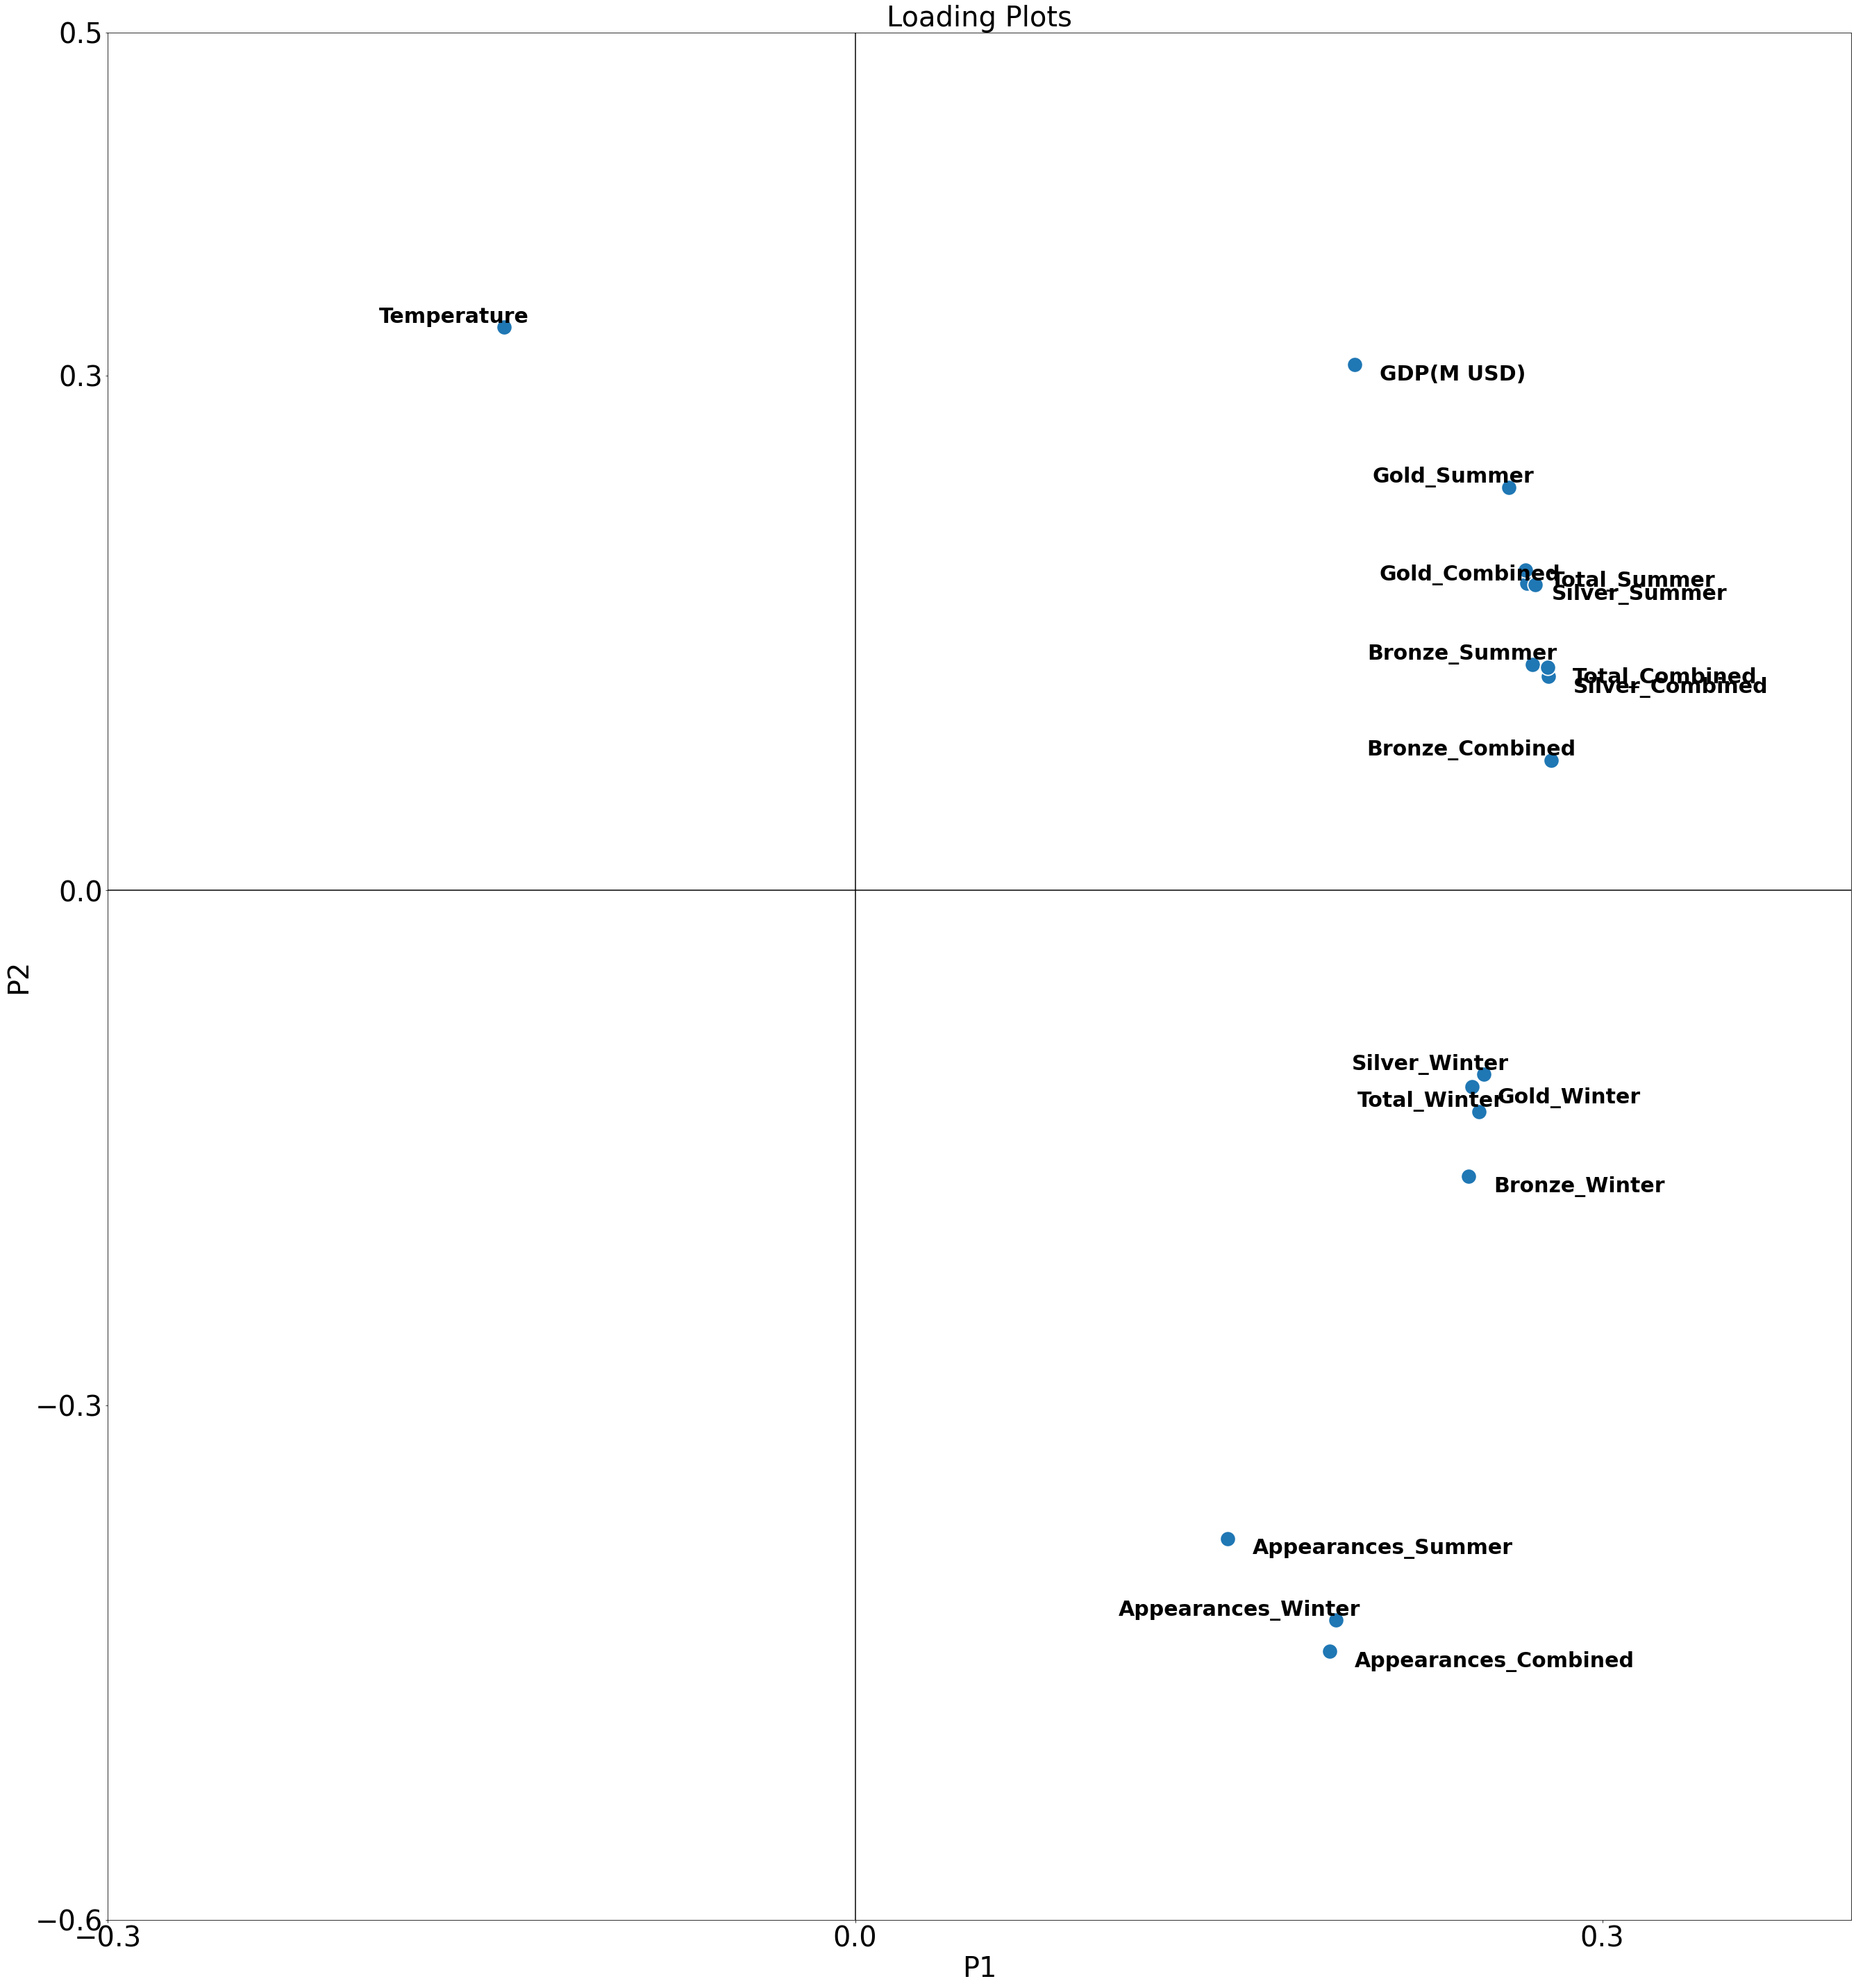

In [88]:
kmeans_best=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans_best.fit(principalComponents)

labels=kmeans_best.labels_
clrs={0:'blue',1:'red',2:'yellow',3:'green',4:'black',5:'pink',6:'purple',7:'grey',8:'magenta',9:'yellowgreen',10:'cyan'}
clr=[]
for i in kmeans_best.labels_:
    clr.append(clrs[i])
plt.figure(figsize=(8,4))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=clr)
plt.plot(np.zeros((100,)),np.linspace(-6,10,100),ls='--',c='k')
plt.plot(np.linspace(-4,25,100),np.zeros((100,)),ls='--',c='k')
plt.ylabel('t2',fontsize=14,fontweight='bold')
plt.xlabel('t1',fontsize=14,fontweight='bold')
plt.yticks([-4,-2 ,0,2,4,6,8],fontweight='bold')
plt.xticks([-2 ,0,5,10,15,20,25],fontweight='bold')
plt.ylim([-6,10])
plt.xlim([-4,25])
columns_pca=Total_medals.columns
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=columns_pca[1:])
loadings.head()
loadings['name_columns']=loadings.index

plt.figure(figsize=(45,50))
scatter_text('PC1','PC2','name_columns',loadings,'Loading Plots','P1','P2')
plt.plot(np.zeros((100,)),np.linspace(-0.6,0.5,100),color='black')
plt.plot(np.linspace(-0.6,0.5,100),np.zeros((100,)),color='black')

plt.ylim([-0.6,0.5])
plt.xlim([-0.3,0.4])
plt.yticks([-0.6,-0.3,0,0.3,0.5],fontsize=40)
plt.xticks([-0.3,0,0.3],fontsize=40)

plt.show()

In [39]:

import seaborn as sns
import matplotlib.pyplot as plt
loadings['name_columns']=loadings.index
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, legend=False,s=500)
    # Add text besides each point
    ii=1
    for line in range(0,data.shape[0]):
        if ii%2==1:
            p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left',va='top' 
                 ,size='large', color='black', weight='semibold',fontsize=30
                   )
        else:
            p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='right',va='bottom' 
                 ,size='large', color='black', weight='semibold',fontsize=30
                   )
        ii+=1

    # Set title and axis labels
    plt.title(title,fontsize=40)
    plt.xlabel(xlabel,fontsize=40)
    plt.ylabel(ylabel,fontsize=40)
    return p1

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


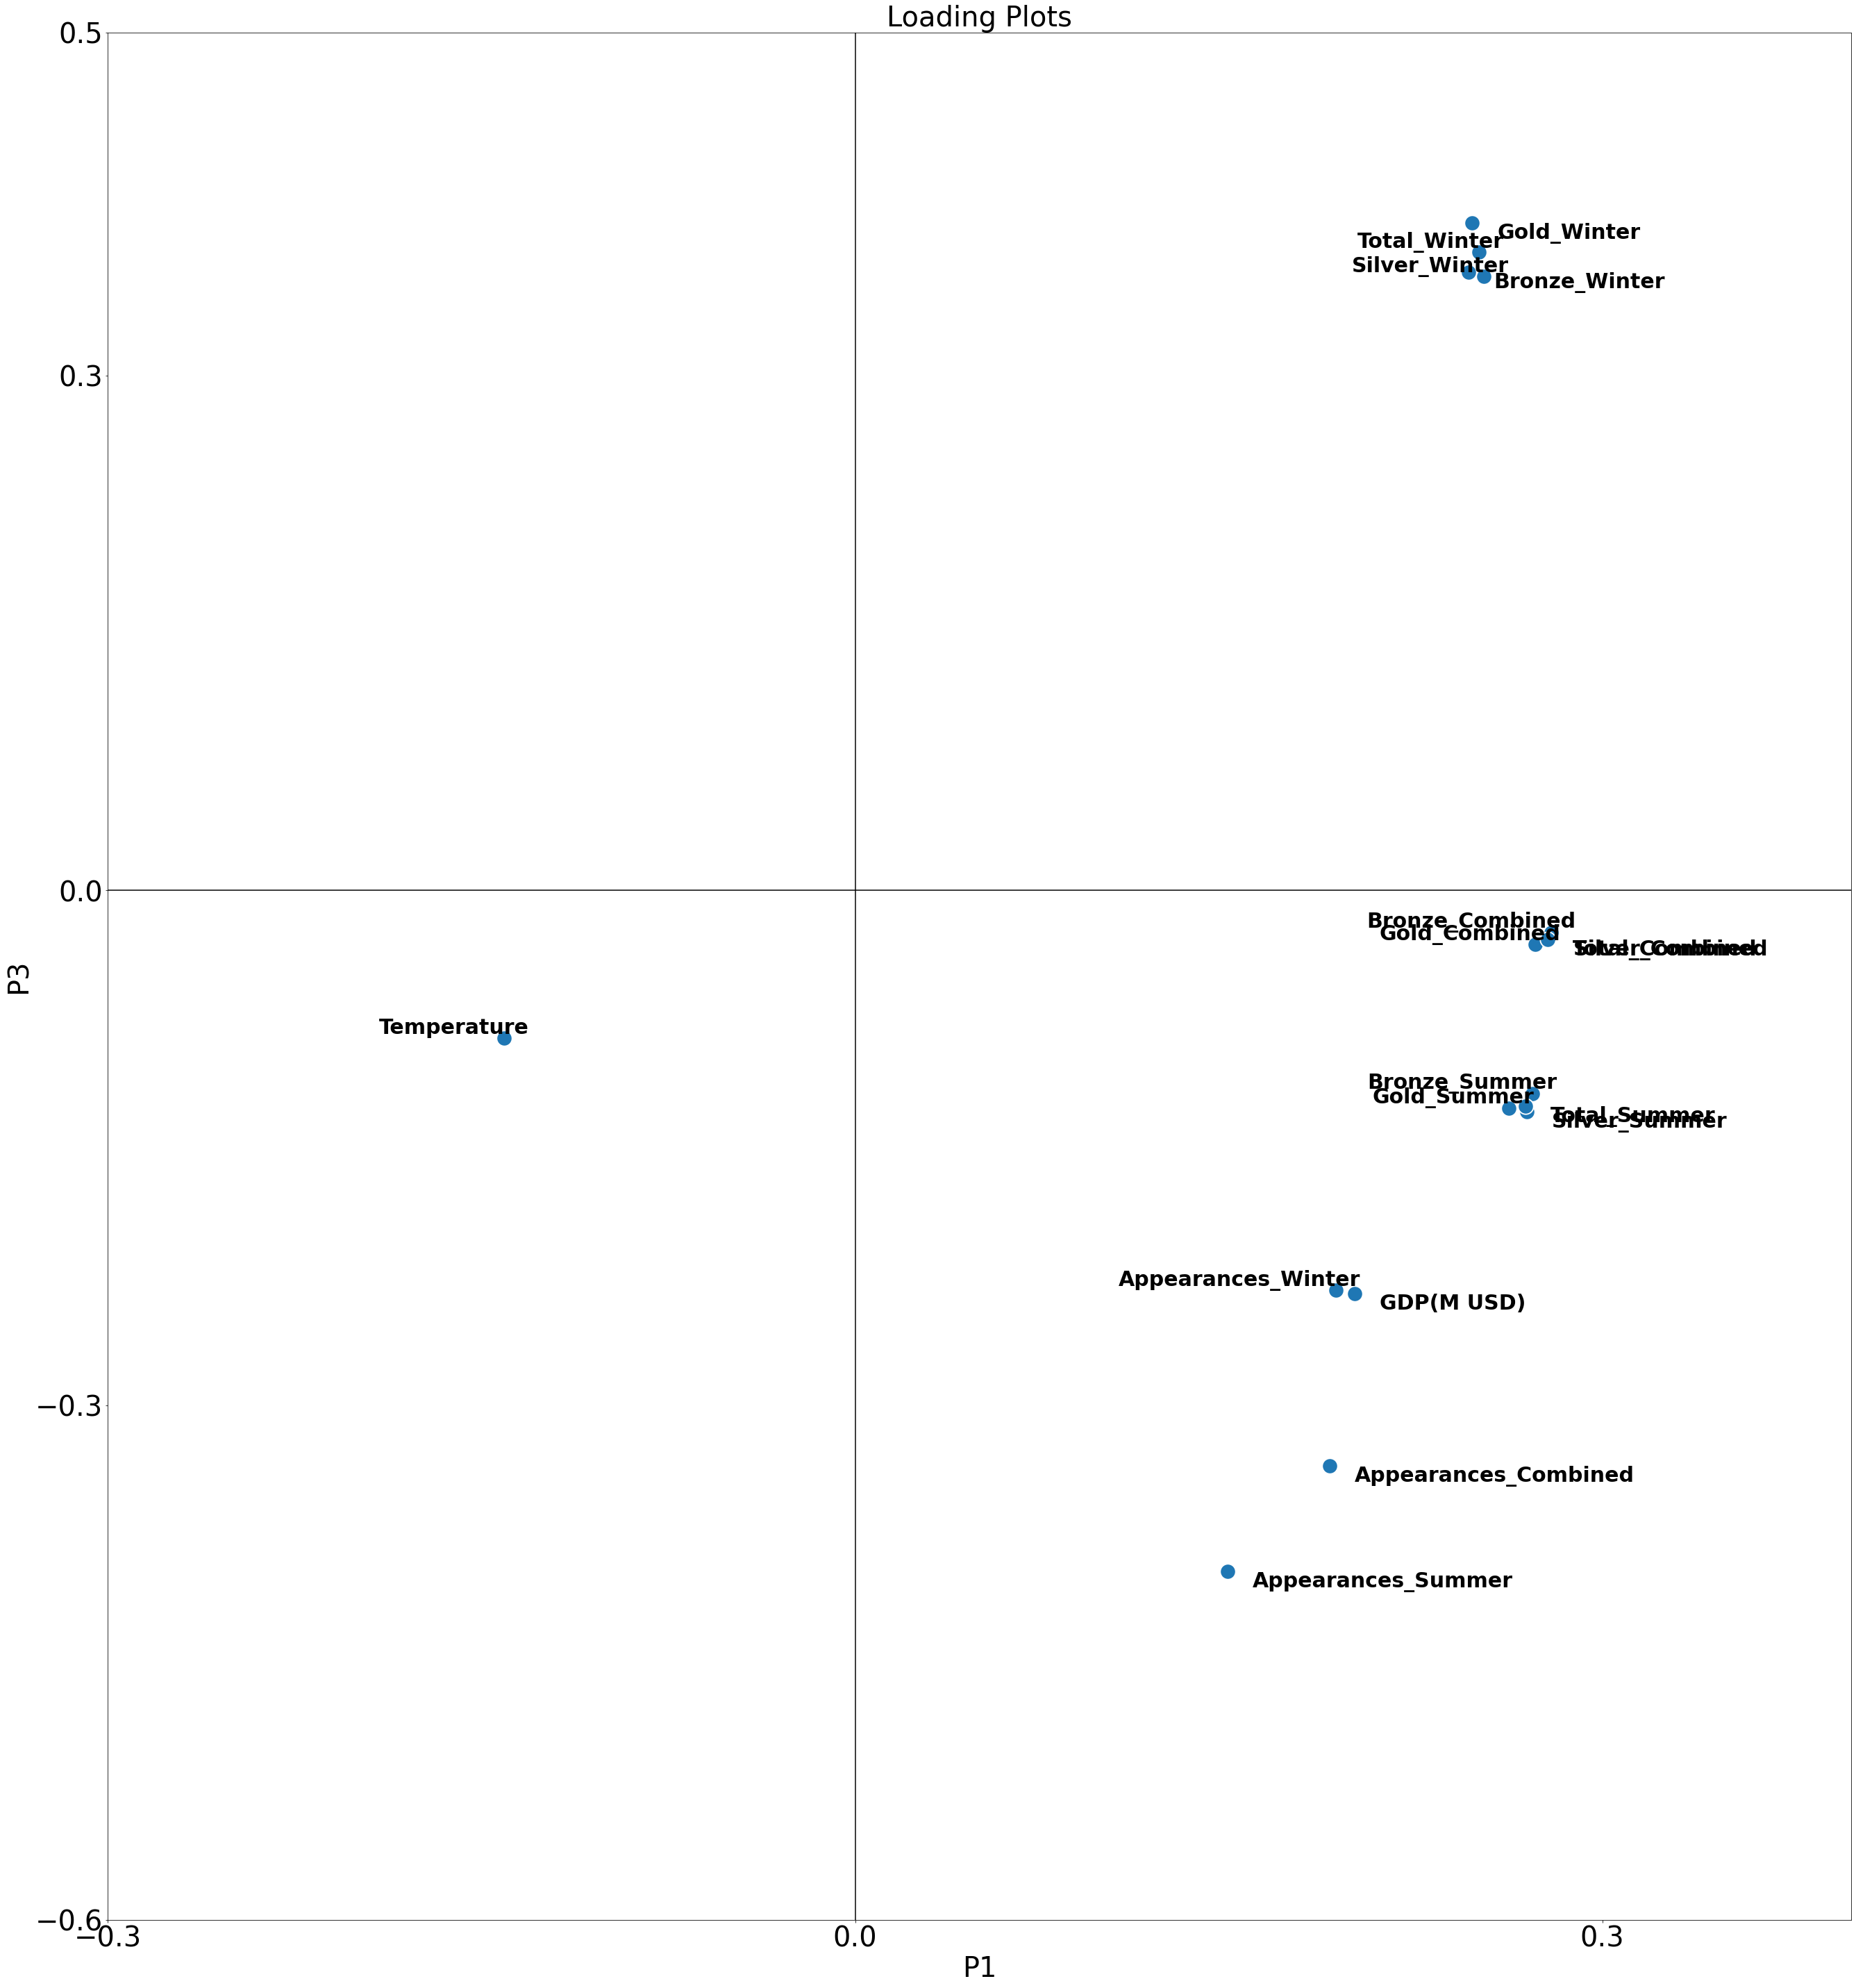

In [84]:
loadings_3['name_columns']=loadings_3.index

plt.figure(figsize=(45,50))
scatter_text('PC1','PC3','name_columns',loadings_3,'Loading Plots','P1','P3')
plt.plot(np.zeros((100,)),np.linspace(-0.6,0.5,100),color='black')
plt.plot(np.linspace(-0.6,0.5,100),np.zeros((100,)),color='black')

plt.ylim([-0.6,0.5])
plt.xlim([-0.3,0.4])
plt.yticks([-0.6,-0.3,0,0.3,0.5],fontsize=40)
plt.xticks([-0.3,0,0.3],fontsize=40)

plt.show()

In [90]:
Total_medals['cluster']=labels

In [99]:
Total_medals[Total_medals['cluster']==0]['Team'].values

array(['Afghanistan', 'Algeria', 'Armenia', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Barbados', 'Belarus', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Colombia', 'Costa Rica', 'Ivory Coast',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Eritrea', 'Ethiopia',
       'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guyana', 'Haiti', 'Hong Kong', 'Indonesia', 'Iraq', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan',
       'Lithuania', 'Malaysia', 'Mauritius', 'Moldova', 'Montenegro',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Qatar', 'San Marino',
       'Saudi Arabia', 'Samoa', 'Senegal', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Sri Lanka', 'Sudan',
       'Suriname', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo',
       'Ton

In [ ]:
5        Australia
6          Austria
22          Canada
24           China
42         Finland
43          France
58         Hungary
         Italy
apan Netherlands
    Norway
        Sweden
   Switzerland